# **HEART DISEASE PREDICTION** 


In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Machine Learning preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# **LOADING AND DISPLAYING DATASET**

In [2]:
# Load the dataset
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **WHOLE DATASET**

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **BASIC OVERVIEW AND INFO**

In [4]:
# Dataset overview
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Shape: (1025, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


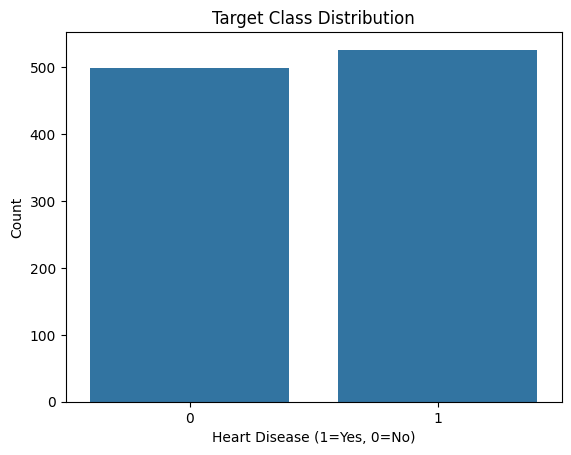

In [5]:
# Target distribution
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# **Correlation heatmap**

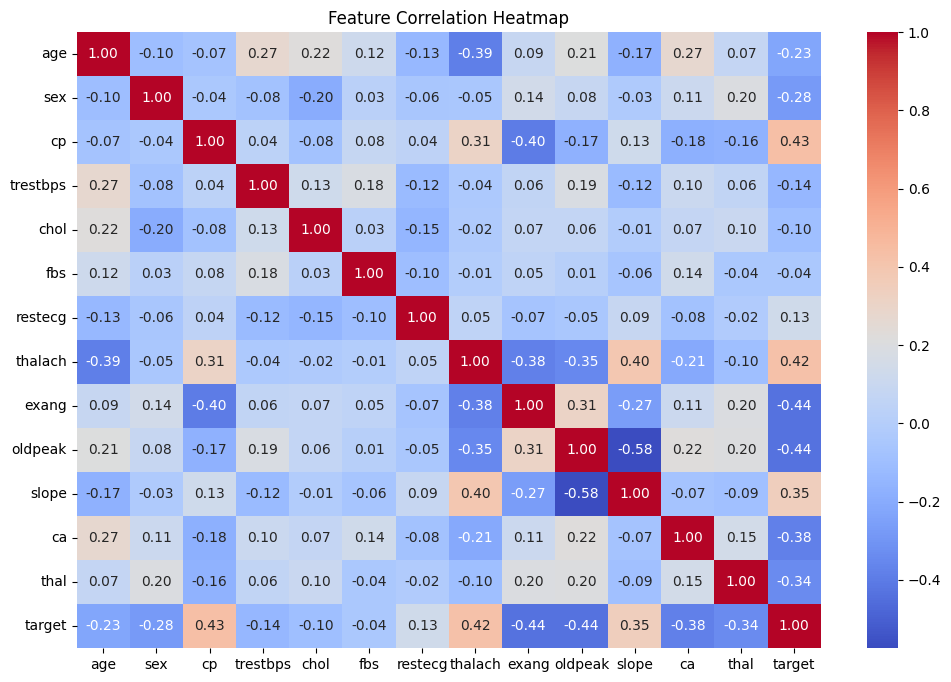

In [6]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Scatter plot of two features vs target**

Text(0.5, 0, 'Age')

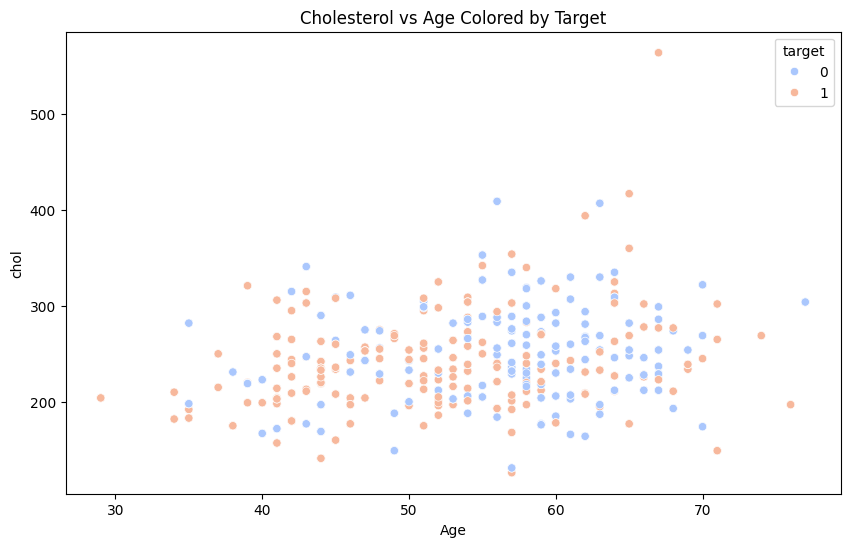

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette='coolwarm')
plt.title("Cholesterol vs Age Colored by Target")
plt.xlabel("Age")

# **Scatter plot of two other features vs target**

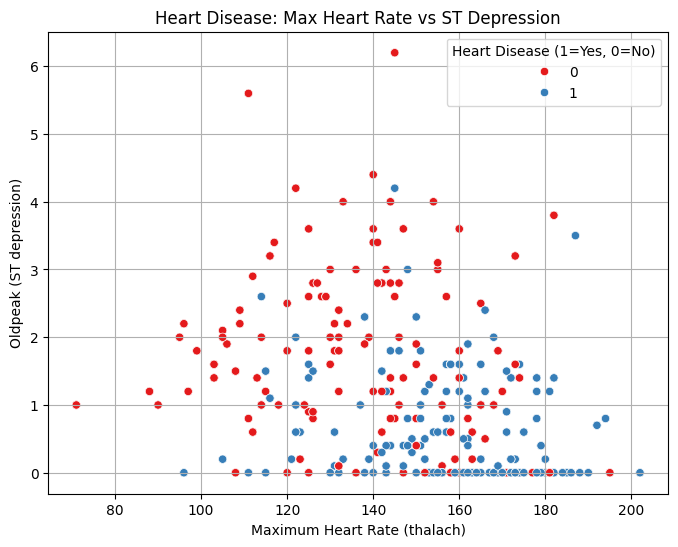

In [8]:
# Scatter plot: thalach (x) vs oldpeak (y), color by target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='thalach', y='oldpeak', hue='target', palette='Set1')
plt.title('Heart Disease: Max Heart Rate vs ST Depression')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Oldpeak (ST depression)')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.grid(True)
plt.show()

# **Pairplot of different features vs Target**

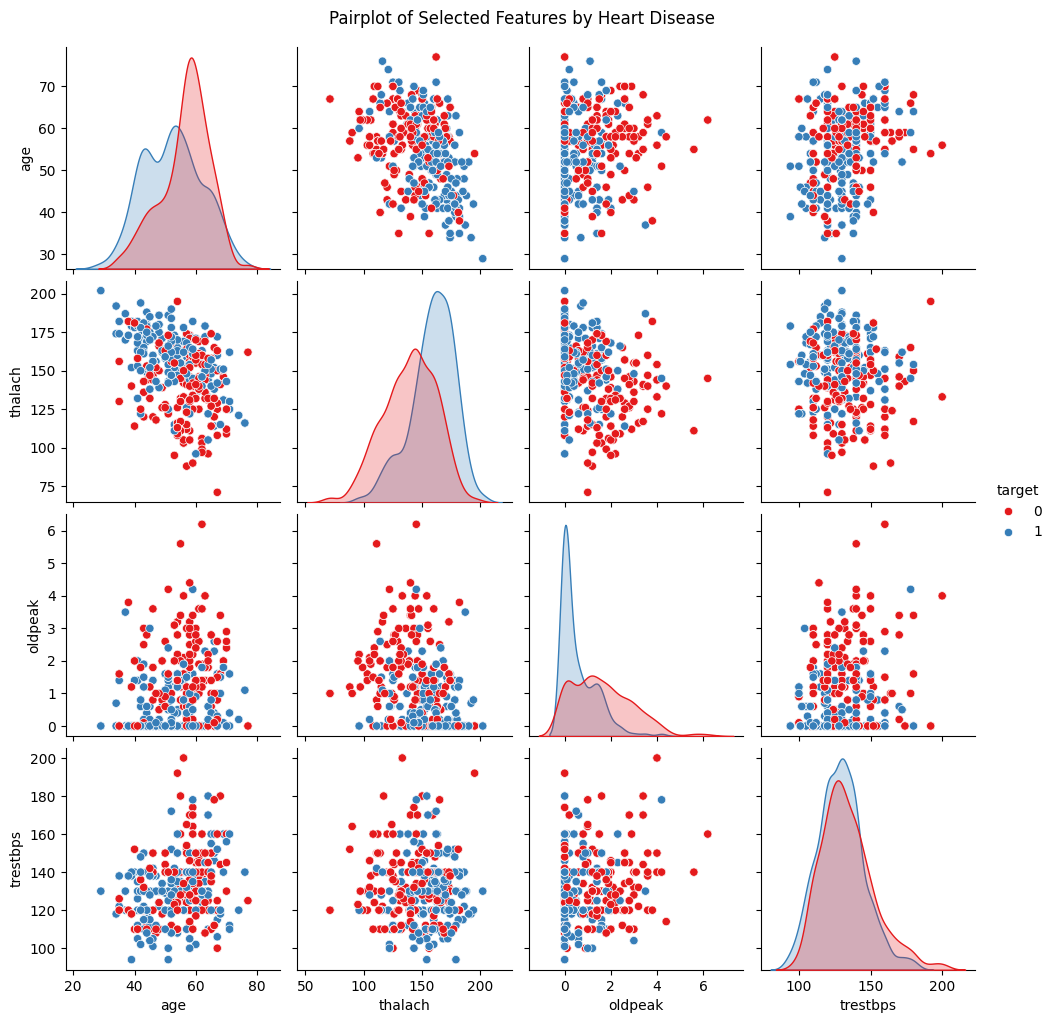

In [9]:
# Select a few important features for the pairplot
selected_features = ['age', 'thalach', 'oldpeak', 'trestbps', 'target']

# Create pairplot
sns.pairplot(df[selected_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Heart Disease', y=1.02)
plt.show()

# **Separate features and target**

In [10]:

X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1025, 13)
Target shape: (1025,)


# **Normalize using StandardScaler**

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


# **Split data into training and testing sets (80/20)**

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 820
Testing samples: 205


In [13]:
# Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Evaluating all models**

In [14]:

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    print(f"\n🔎 Model: {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔎 Model: Logistic Regression
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


🔎 Model: Decision Tree
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


🔎 Model: Random Forest
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classificat

# **ROC curve for Random Forest**

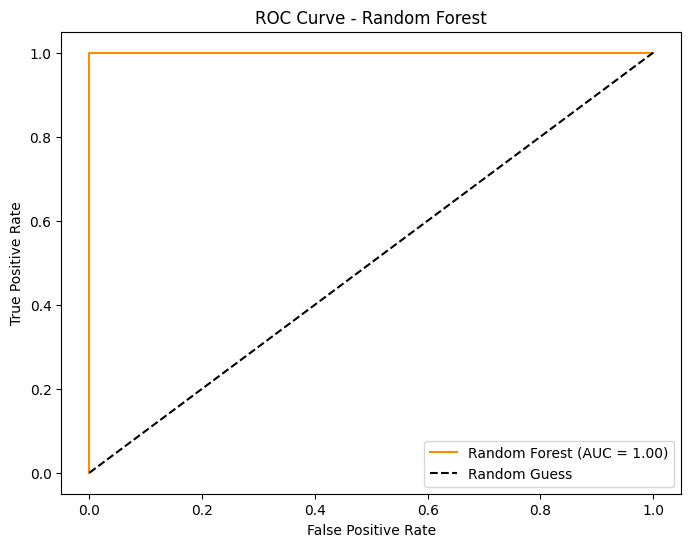

In [15]:

y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %.2f)' % roc_auc_score(y_test, y_probs), color='darkorange')
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


# Grid search for Random Forest tuning

In [16]:

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model evaluation
print("Best parameters found:", grid.best_params_)
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best parameters found: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Accuracy: 0.9853658536585366


In [17]:
print("✅ Heart Disease Prediction Project completed successfully!")


✅ Heart Disease Prediction Project completed successfully!


In [22]:
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

# **NOW WE CHECK MODEL FOR A NEW PATIENT** 

In [18]:
# New patient data
new_patient = [[80, 1, 2, 140, 167, 0, 1, 250, 0, 1.5, 1, 0, 2]]

# Scale the input
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = rf.predict(new_patient_scaled)
probability = rf.predict_proba(new_patient_scaled)[0][1]

# Display result
if prediction[0] == 1:
    print("⚠️ The model predicts: Patient may have heart disease.")
else:
    print("✅ The model predicts: Patient likely does NOT have heart disease.")

print(f"🔍 Probability of heart disease: {probability:.2%}")


⚠️ The model predicts: Patient may have heart disease.
🔍 Probability of heart disease: 66.00%


C:\Users\sam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Check for one more Patient**

In [19]:
# Creating new patient data (same order as dataset features)
new_patient2 = [[54, 0, 1, 130, 250, 0, 1, 170, 0, 1.2, 2, 0, 2]]

# Normalize (use the same scaler as training)
new_patient2_scaled = scaler.transform(new_patient2)

# Predict using Logistic Regression model
prediction_lr = lr.predict(new_patient2_scaled)
probability_lr = lr.predict_proba(new_patient2_scaled)[0][1]  # probability of class 1 (disease)

# Display results
if prediction_lr[0] == 1:
    print("⚠️ Logistic Regression predicts: Patient MAY have heart disease.")
else:
    print("✅ Logistic Regression predicts: Patient likely does NOT have heart disease.")

print(f"🔍 Probability of heart disease: {probability_lr:.2%}")


⚠️ Logistic Regression predicts: Patient MAY have heart disease.
🔍 Probability of heart disease: 96.87%


C:\Users\sam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Displaying the dataset first 9 rows with target and prediction and Model Performances**

In [20]:
# Preprocessing
X = df.drop("target", axis=1)
y = df["target"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (for training only)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Apply Model to ALL Patient Records
y_pred_all = lr.predict(X_scaled)  # predicted class (0 or 1)
y_proba_all = lr.predict_proba(X_scaled)[:, 1]  # predicted probability of class 1

# Combine Predictions with Original Data
df_results = df.copy()
df_results['Predicted'] = y_pred_all
df_results['Probability'] = y_proba_all

# Show first 10 records with predictions
print("\n🔍 Sample Predictions:")
print(df_results[['age', 'chol', 'target', 'Predicted', 'Probability']].head(10))

# Evaluate Model on Full Dataset
accuracy_all = accuracy_score(y, y_pred_all)
print(f"\n✅ Model Accuracy on Full Dataset: {accuracy_all:.2%}")

# Classification report and confusion matrix
print("\n📊 Classification Report:")
print(classification_report(y, y_pred_all))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y, y_pred_all))


🔍 Sample Predictions:
   age  chol  target  Predicted  Probability
0   52   212       0          0     0.189353
1   53   203       0          0     0.014103
2   70   174       0          0     0.015287
3   61   203       0          0     0.375528
4   62   294       0          0     0.030590
5   58   248       1          1     0.745806
6   58   318       0          0     0.008173
7   55   289       0          0     0.014708
8   46   249       0          0     0.295079
9   54   286       0          0     0.003497

✅ Model Accuracy on Full Dataset: 85.66%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       499
           1       0.83      0.90      0.87       526

    accuracy                           0.86      1025
   macro avg       0.86      0.86      0.86      1025
weighted avg       0.86      0.86      0.86      1025


🧱 Confusion Matrix:
[[402  97]
 [ 50 476]]


In [21]:
df_results

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted,Probability
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0,0.189353
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0,0.014103
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,0.015287
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,0.375528
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0,0.030590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,1,0.807752
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0.008597
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0,0.048342
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1,0.958372


# **Conclusion**

# Above is the all dataset with the with the target and prediction .
# The last "df_result" shows the probability of heart disease model for every patient in the dataset 